In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI

query = 'git hub copoilot은 무료로 사용할 수 있나요?'

llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='GitHub Copilot은 기본적으로 유료 서비스입니다. 그러나 GitHub에서는 학생이나 오픈 소스 프로젝트에 기여하는 개발자 등 특정 조건을 갖춘 사용자에게 무료로 제공하기도 합니다. 학생 인증을 받은 경우 GitHub Copilot을 무료로 사용할 수 있습니다. 또한 GitHub Copilot의 무료 체험 기간이 제공될 수도 있으니, GitHub 공식 웹사이트에서 최신 정보를 확인하는 것이 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 20, 'total_tokens': 112, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-cd6567b4-2081-4d18-9429-a04543d9a080-0', usage_metadata={'input_tokens': 20, 'output_tokens': 92, 'total_tokens': 112, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
from typing import Annotated 
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [5]:
from langgraph.graph  import StateGraph

graph_builder = StateGraph(AgentState)

In [6]:
def generate(state: AgentState) -> AgentState: 
    message = state['messages']
    ai_message = llm.invoke(message)
    return {'messages': message + [ai_message]} 

In [7]:
from langgraph.graph import START, END 

graph_builder.add_node('generate', generate)
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)
graph = graph_builder.compile()

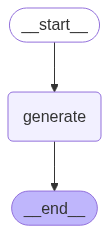

In [8]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import  HumanMessage 

initial_state = {'messages': [HumanMessage(content=query)]}
graph.invoke(initial_state)

{'messages': [HumanMessage(content='git hub copoilot은 무료로 사용할 수 있나요?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='GitHub Copilot은 무료로 사용할 수 있는 옵션이 없으며, 일반적으로 유료 구독 서비스입니다. 그러나 GitHub는 학생이나 오픈 소스 프로젝트에 기여하는 개발자들에게 특정 조건 하에 무료 사용을 제공할 수 있습니다. 최신 정보나 가격 정책은 GitHub의 공식 웹사이트에서 확인하는 것이 가장 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 20, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-77a785f6-8eab-41e3-8e3e-34d02347fc32-0', usage_metadata={'input_tokens': 20, 'output_tokens': 74, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, '